In [1]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib as mp
columns = dfs.columns
total_entries = len(dfs)
for index, col in enumerate(columns):
    print(str(col) + ":" + str(index))

eventid:0
iyear:1
imonth:2
iday:3
approxdate:4
extended:5
resolution:6
country:7
country_txt:8
region:9
region_txt:10
provstate:11
city:12
latitude:13
longitude:14
specificity:15
vicinity:16
location:17
summary:18
crit1:19
crit2:20
crit3:21
doubtterr:22
alternative:23
alternative_txt:24
multiple:25
success:26
suicide:27
attacktype1:28
attacktype1_txt:29
attacktype2:30
attacktype2_txt:31
attacktype3:32
attacktype3_txt:33
targtype1:34
targtype1_txt:35
targsubtype1:36
targsubtype1_txt:37
corp1:38
target1:39
natlty1:40
natlty1_txt:41
targtype2:42
targtype2_txt:43
targsubtype2:44
targsubtype2_txt:45
corp2:46
target2:47
natlty2:48
natlty2_txt:49
targtype3:50
targtype3_txt:51
targsubtype3:52
targsubtype3_txt:53
corp3:54
target3:55
natlty3:56
natlty3_txt:57
gname:58
gsubname:59
gname2:60
gsubname2:61
gname3:62
ingroup:63
ingroup2:64
ingroup3:65
gsubname3:66
motive:67
guncertain1:68
guncertain2:69
guncertain3:70
nperps:71
nperpcap:72
claimed:73
claimmode:74
claimmode_txt:75
claim2:76
claimmode2

iyear
Missing year: 1993
Length matches.
Sum of year frequencies = Number of total entries


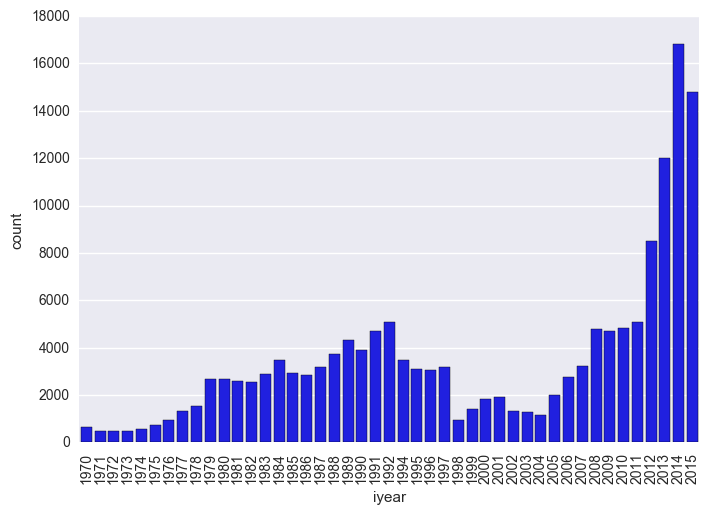

In [5]:
# Start with Column 1. Describes the year of the event. Ignoring column 0 as it's just a unique ID. 
# Maybe useful later to create dictionaries.
# Histogram shows the number of incidents per year
curr = columns[1]
curr_column = dfs[curr]
print(curr)
unique_years, year_counts = np.unique(curr_column, return_counts=True)
count = 0
# Check if any year is missing from the data
for i in range(unique_years[0],unique_years[len(unique_years)-1]):
    if i != unique_years[i-1970-count]:
        print("Missing year: " + str(i))
        count = count+1
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(year_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column,color='b')
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

imonth
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[   23 12878 11824 13138 13090 14423 13107 14117 13644 12200 13591 12968
 11769]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of month  frequencies = Number of total entries


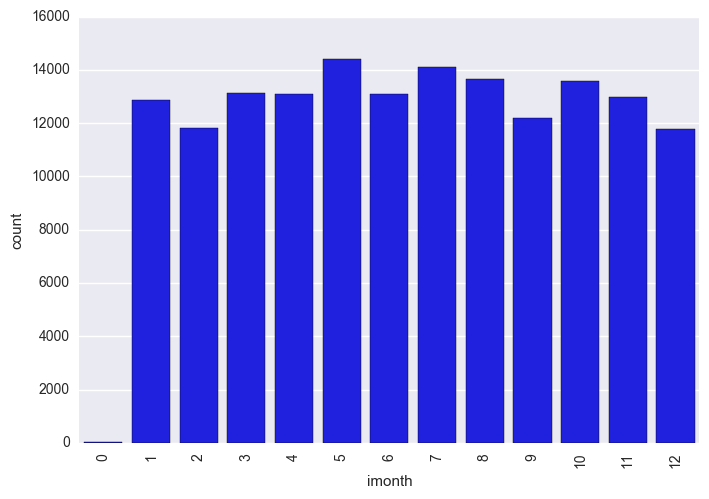

In [6]:
# Start with Column 2. Month of attack.
# Histogram shows the number of incidents per month, over all years
curr = columns[2]
curr_column = dfs[curr]
print(curr)
unique_months, month_counts = np.unique(curr_column, return_counts=True)
print(unique_months)
print(month_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any month is missing in the data
for i in range(0,12):
    if i not in unique_months:
        print("Missing month: " + str(i))
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(month_counts)
if total_entries == total:
    print("Sum of month  frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column,color='b')
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

iday
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 894 5540 5193 5202 5334 5005 4956 5150 5043 5247 5294 5155 5171 5246 5251
 5571 5319 5107 5036 5133 5132 4894 5037 4981 4944 5021 5021 5109 5164 4700
 4308 2614]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of day frequencies = Number of total entries


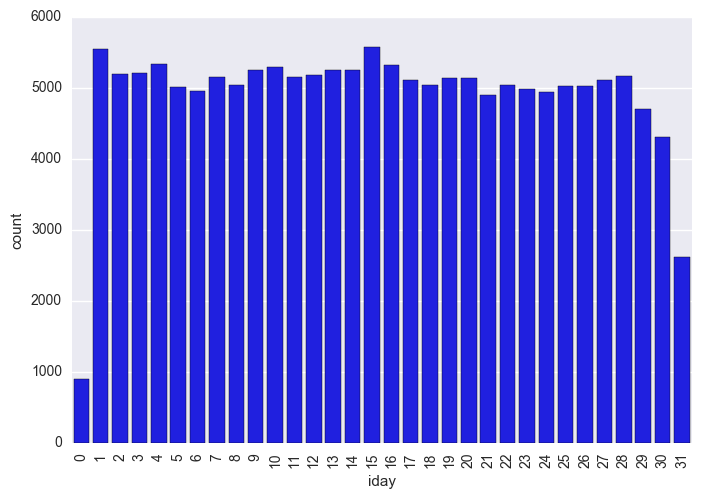

In [8]:
# Start with Column 3. Date of attack.
# Histogram shows the number of incidents per day, over all years
curr = columns[3]
curr_column = dfs[curr]
print(curr)
unique_days, day_counts = np.unique(curr_column, return_counts=True)
print(unique_days)
print(day_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any day is missing in the data
for i in range(0,31):
    if i not in unique_days:
        print("Missing day: " + str(i))
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(day_counts)
if total_entries == total:
    print("Sum of day frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column,color='b')
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nperps
nkill


D:\Users\Avradip\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


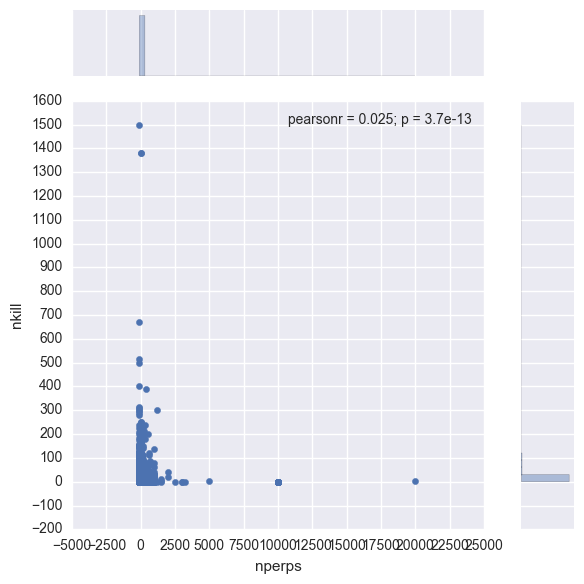

In [8]:
#nperps vs nkills
curr = columns[71]
sec = columns[100]
print(curr)
print(sec)
g = sns.jointplot(curr, sec, dfs)
mp.rcParams.update({'figure.autolayout': True})
g.ax_joint.xaxis.set_major_locator(mp.ticker.MultipleLocator(2500))
g.ax_joint.yaxis.set_major_locator(mp.ticker.MultipleLocator(100))

attacktype1
nkill
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


D:\Users\Avradip\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


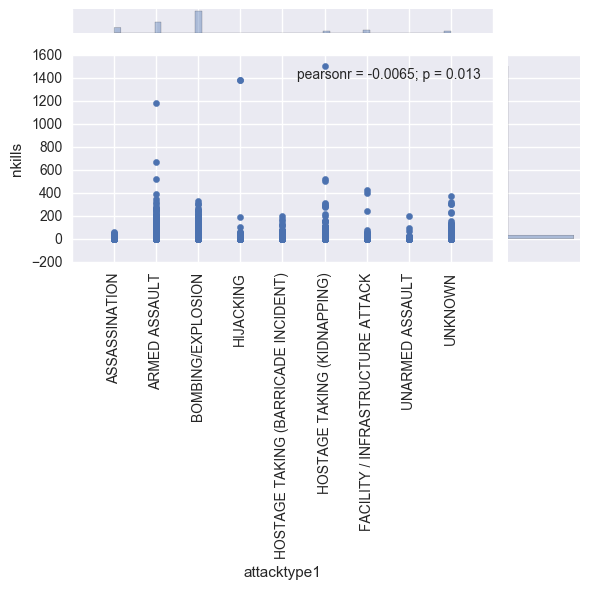

In [13]:
#attacktype1_txt vs nkills
curr = columns[28]
sec = columns[100]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["", "", "ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
x_arr = np.asarray(dfs[curr])
y_arr = np.asarray(dfs[sec])
g = sns.jointplot(x_arr,y_arr)

mp.rcParams.update({'figure.autolayout': True})
g.ax_joint.xaxis.set_major_locator(mp.ticker.MultipleLocator(1))
g.ax_joint.xaxis.set_label_text('attacktype1')
g.ax_joint.yaxis.set_label_text('nkills')
g.ax_joint.xaxis.set_ticklabels(xaxes,rotation=90)
#g.ax_joint.xaxis.set

weaptype1
nkill
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


D:\Users\Avradip\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


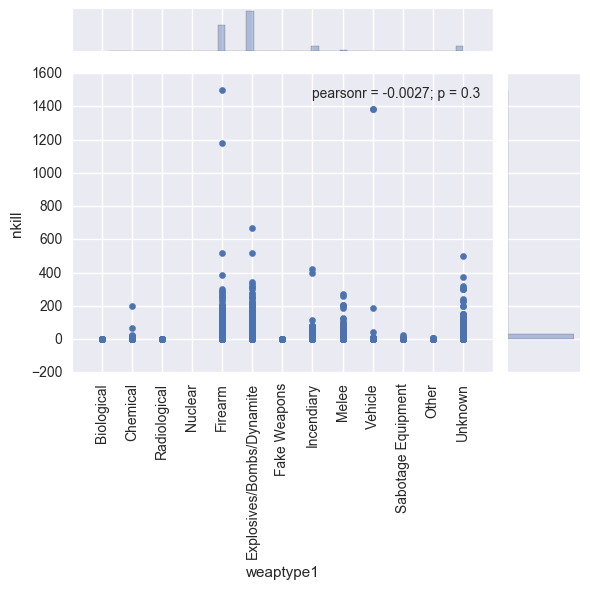

In [15]:
#weaptype1 vs nkills
curr = columns[83]
sec = columns[100]
xaxes = ["", "", "Biological","Chemical","Radiological","Nuclear","Firearm","Explosives/Bombs/Dynamite","Fake Weapons","Incendiary","Melee","Vehicle","Sabotage Equipment","Other","Unknown"]
print(curr)
print(sec)
print(xaxes_str)
g = sns.jointplot(curr, sec, dfs)
g.ax_joint.xaxis.set_major_locator(mp.ticker.MultipleLocator(1))
mp.rcParams.update({'figure.autolayout': True})
#g.ax_joint.xaxis.set_label_text('weaptype1')
#g.ax_joint.yaxis.set_label_text('nkills')
g.ax_joint.xaxis.set_ticklabels(xaxes,rotation=90)
#g.ax_joint.xaxis.set

country
nkill


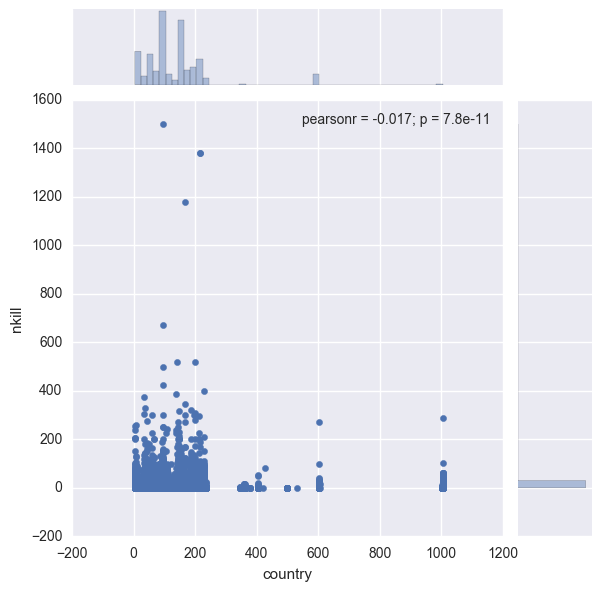

In [22]:
#country vs nkills
curr = columns[7]
sec = columns[100]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
weaptype1
X Axis Legend: X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN
Y Axis Legend: 1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown


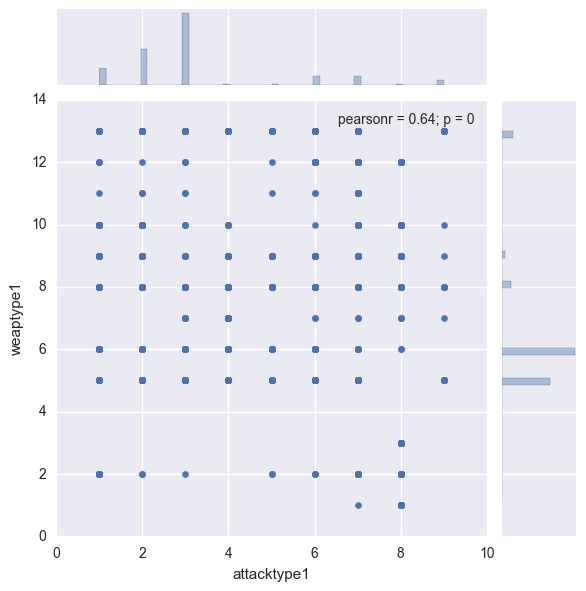

In [24]:
#Attacktype vs weapon type
curr = columns[28]
sec = columns[83]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
yaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
print("X Axis Legend: " + xaxes_str)
print("Y Axis Legend: " + yaxes_str)
sns.jointplot(curr, sec, dfs)

country
nperps


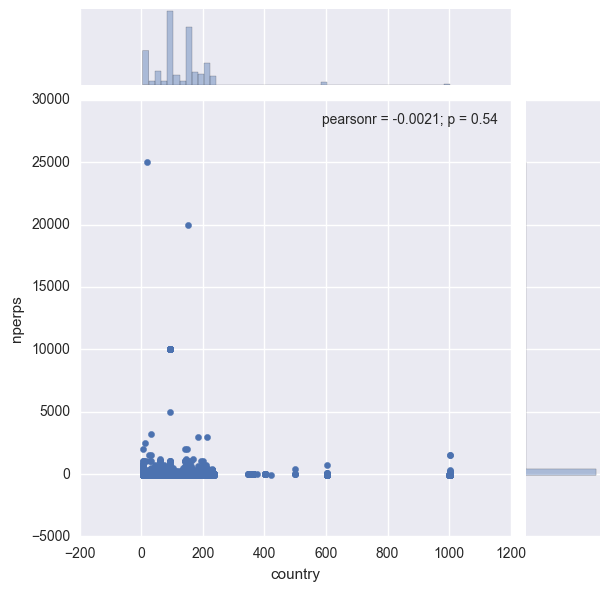

In [25]:
#country vs nperps
curr = columns[7]
sec = columns[71]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
nperps
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


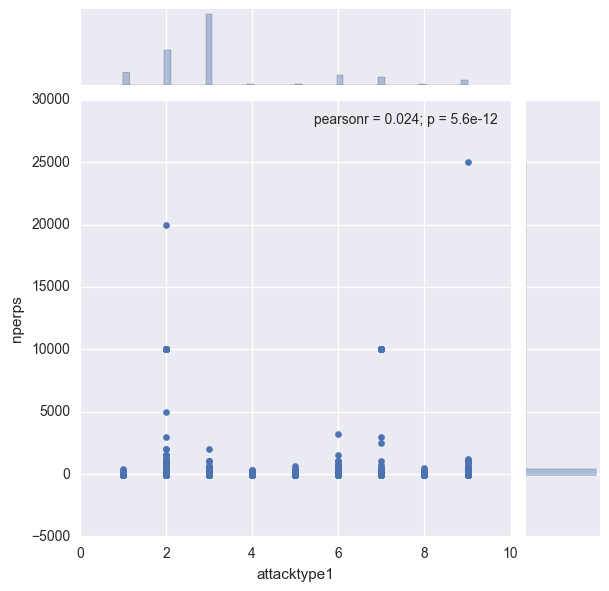

In [26]:
#attacktype1_txt vs nperps
curr = columns[28]
sec = columns[71]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

weaptype1
nperps
X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN


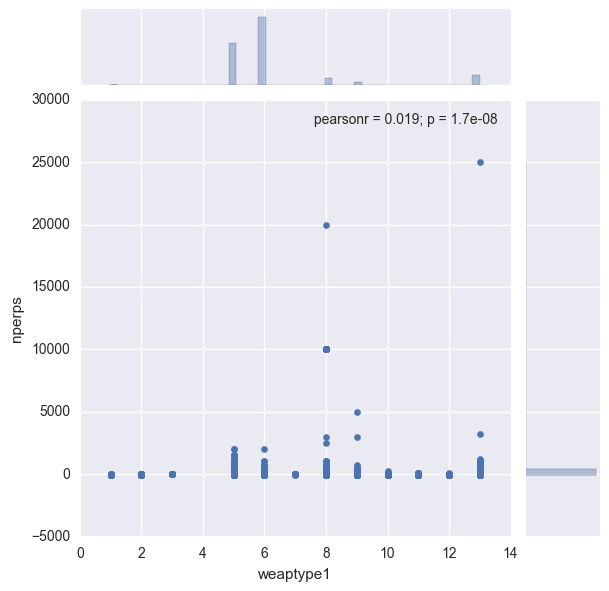

In [28]:
#weaptype1 vs nperps
curr = columns[83]
sec = columns[71]
xaxes_str = "X-Axis: 1 = ASSASSINATION 2 = ARMED ASSAULT 3 = BOMBING/EXPLOSION 4 = HIJACKING 5 = HOSTAGE TAKING (BARRICADE INCIDENT) 6 = HOSTAGE TAKING (KIDNAPPING) 7 = FACILITY / INFRASTRUCTURE ATTACK 8 = UNARMED ASSAULT 9 = UNKNOWN"
xaxes = ["ASSASSINATION","ARMED ASSAULT","BOMBING/EXPLOSION","HIJACKING","HOSTAGE TAKING (BARRICADE INCIDENT)","HOSTAGE TAKING (KIDNAPPING)","FACILITY / INFRASTRUCTURE ATTACK","UNARMED ASSAULT", "UNKNOWN"]
print(curr)
print(sec)
print(xaxes_str)
sns.jointplot(curr, sec, dfs)

country
ingroup


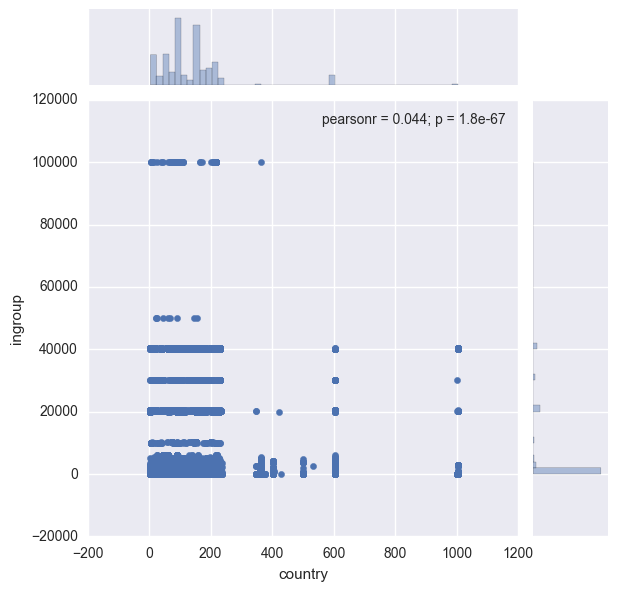

In [29]:
#country vs ingroup
curr = columns[7]
sec = columns[63]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nkill
ingroup


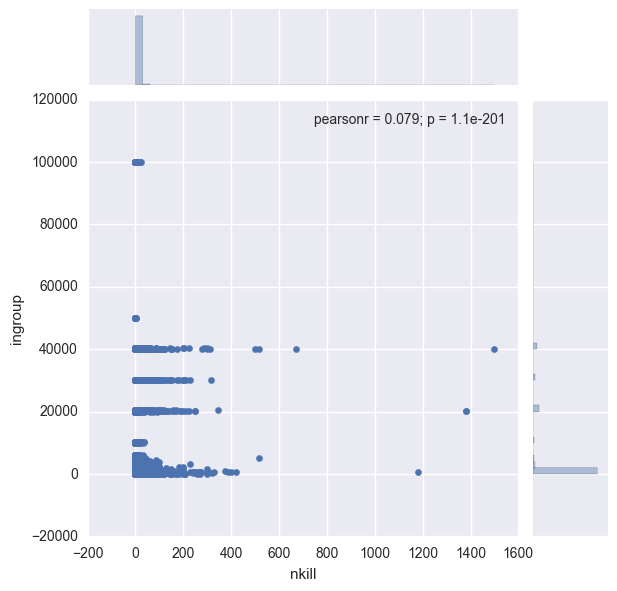

In [30]:
#nkill vs ingroup
curr = columns[100]
sec = columns[63]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nkill
success


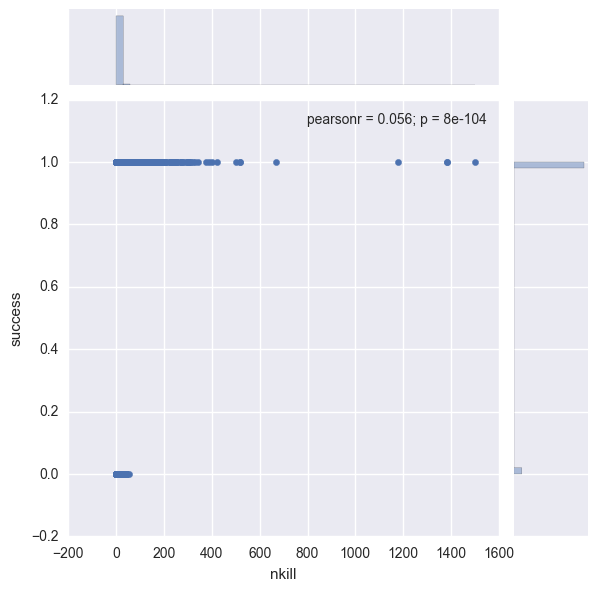

In [31]:
#nkill vs success
curr = columns[100]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

ingroup
success


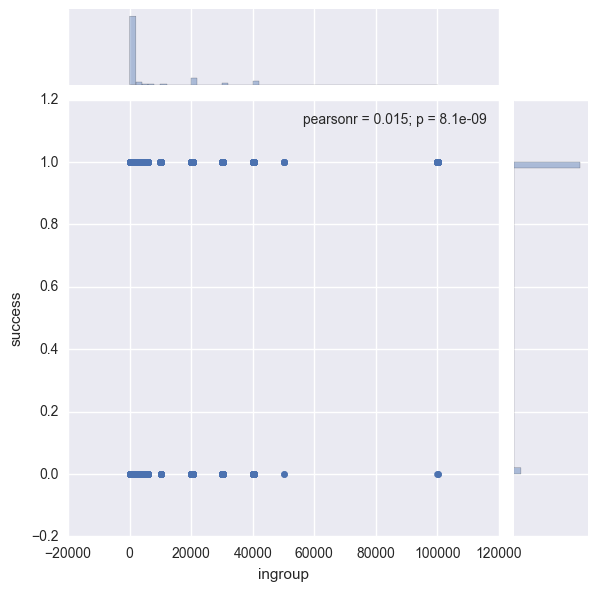

In [32]:
#ingroup vs success
curr = columns[63]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

nperps
success


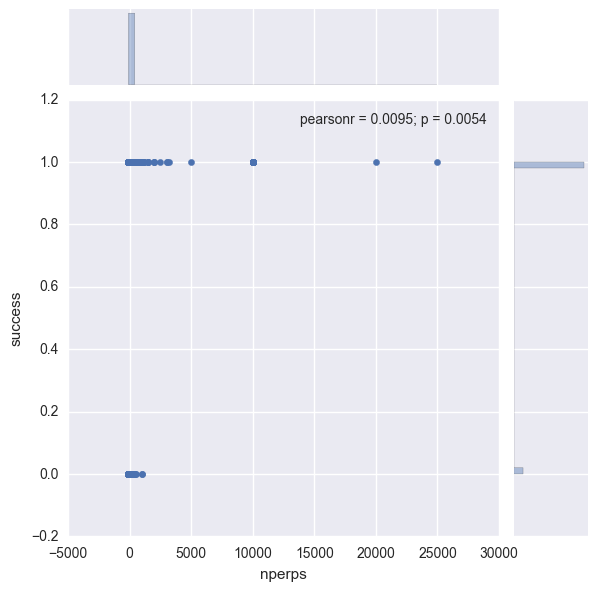

In [33]:
#nperps vs success
curr = columns[71]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

country
success


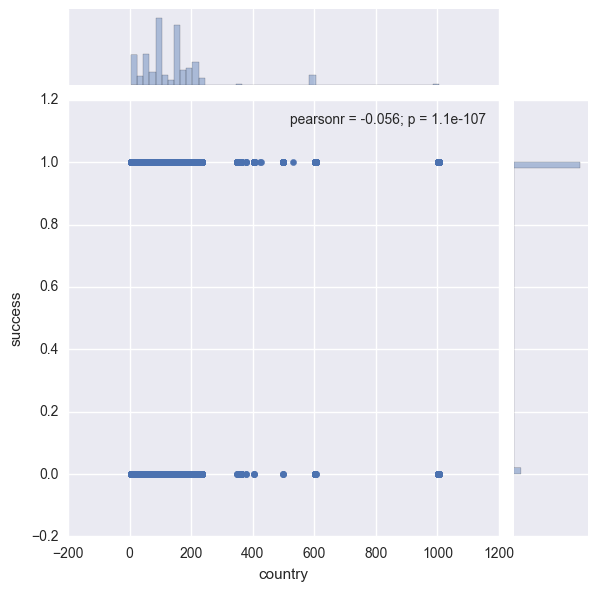

In [34]:
#country vs success
curr = columns[7]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

attacktype1
success


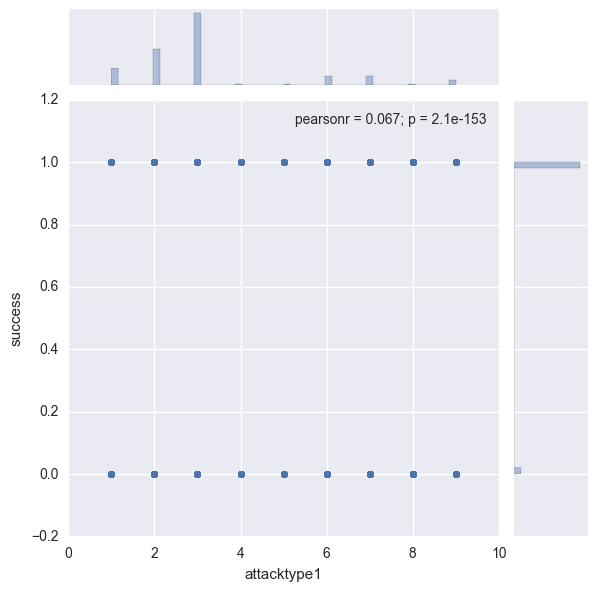

In [35]:
#attacktype vs success
curr = columns[28]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)

weaptype1
success


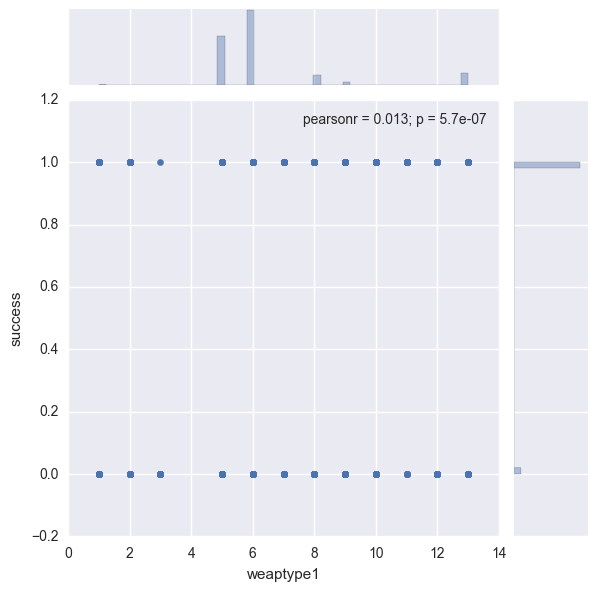

In [36]:
#weaoontype vs success
curr = columns[83]
sec = columns[26]
#xaxes_str = "1 = Biological 2 = Chemical 3 = Radiological 4 = Nuclear 5 = Firearm 6 = Explosives/Bombs/Dynamite 7 = Fake Weapons 8 = Incendiary 9 = Melee 10 = Vehicle 11 = Sabotage Equipment 12 = Other 13 = Unknown"
print(curr)
print(sec)
#print(xaxes_str)
sns.jointplot(curr, sec, dfs)